19BCB0007 - PATIL DARSHAN RAJKUMAR

# **AdaBoost - Classifier**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
df=pd.DataFrame(iris.data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df.shape

(150, 4)

In [ ]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
print(df.columns)

RangeIndex(start=0, stop=4, step=1)


In [ ]:
df.notnull()

,0,1,2,3
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
145,True,True,True,True
146,True,True,True,True
147,True,True,True,True
148,True,True,True,True


In [ ]:
df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [ ]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
abc

AdaBoostClassifier(learning_rate=1)

In [ ]:
model = abc.fit(X_train, y_train)
model

AdaBoostClassifier(learning_rate=1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy Score : ',accuracy_score(y_test, y_pred))

Accuracy Score :  0.9666666666666667


In [ ]:
print('Error Score : ' , 1- accuracy_score(y_test, y_pred))

Error Score :  0.033333333333333326


In [ ]:
print('Confusion Matrix : ')
cf=confusion_matrix(y_test,y_pred)
print(cf)

Confusion Matrix : 
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


Text(0.5, 15.0, 'Predicted')

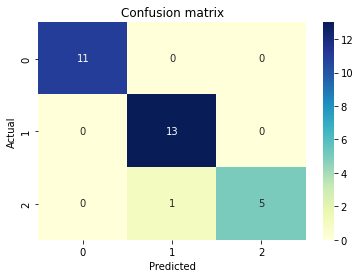

In [ ]:
sns.heatmap(pd.DataFrame(cf), annot=True, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print('Classification Report : \n', classification_report(y_test,y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



# **Using Different Base Learners - Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
abcd =AdaBoostClassifier(n_estimators=50, base_estimator=dt,learning_rate=1)
abcd

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1)

In [ ]:
model_ada_dt = abcd.fit(X_train, y_train)
model_ada_dt

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1)

In [ ]:
y_pred_dt = model_ada_dt.predict(X_test)
y_pred_dt

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
print('Accuracy Score : ',accuracy_score(y_test, y_pred_dt))

Accuracy Score :  1.0


In [ ]:
print('Error Score : ' , 1- accuracy_score(y_test, y_pred_dt))

Error Score :  0.0


In [ ]:
print('Confusion Matrix : ')
cf=confusion_matrix(y_test,y_pred_dt)
print(cf)

Confusion Matrix : 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


Text(0.5, 15.0, 'Predicted')

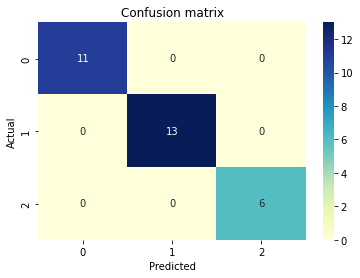

In [ ]:
sns.heatmap(pd.DataFrame(cf), annot=True, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print('Classification Report : \n', classification_report(y_test,y_pred_dt))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

